# Importando Bibliotecas

In [52]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

Seta configurações de exibição

In [18]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 50)

In [19]:
df = pd.read_csv("32.csv", index_col=0)

Exibe o shape (linhas x colunas)

In [20]:
df.shape

(1358, 3980)

In [21]:
df.head()

,"ACESSORIO CABO DE FORCA BR 1,80M PRETO M/F C7",ACESSORIO MONOPOD PAU DE SELFIE CABO AMARELO,ACESSORIO MONOPOD PAU DE SELFIE CABO AZUL,ACESSORIO MONOPOD PAU DE SELFIE CABO BRANCO,ACESSORIO MONOPOD PAU DE SELFIE CABO PRETO,ACESSORIO MONOPOD PAU DE SELFIE CABO ROSA,AEREO 120CM 3P CG196 TKA-VERMONT,AEREO CD-211 DUPLO C/NICHO CARV/ONIX UV,AEREO CD-212 QUADRADO 612 CARV/ONIX UV,AEREO GELADEIRA NAPOLI 800X475X305 CARV/BR,...,VENTILADOR VF50 SILENCE FORCE MESA 50CM,VENTILADOR VF52 SILENCE FORCE COLUNA,VENTILADOR VFM2 SIL FORCE VE3230B4,VENTILADOR VFM3 SIL FORCE VE3240B4 PT,VENTILADOR ZEFIRO BLACK 220V MALLORY,VENTILADOR ZEFIRO BR MALLORY,VENTILADOR ZT 401 ZAITEC MATRIX,VIVOBOOK 2G 500 CEL TOUCH ROSA X200MA CT139H,VIVOBOOK 2G 500 CEL TOUCH X200MA CT138H,XXXXXXXXXXXXXXXXXXXXXXXX
2015-01-02,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-03,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-05,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,2.0,0.0,0.0,0.0,NaN
2015-01-06,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-07,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,NaN


Obtem as 'labels' das linhas e converte para o formato datetime do pandas (recursos para trabalhar com dados de série temporal)

In [22]:
df.index = pd.to_datetime(df.index)

Obtem as 'labels' das colunas e converte para o formato de lista

In [23]:
cols = df.columns.tolist()

Exibe um gráfico de barras mostrando a nulidade por coluna

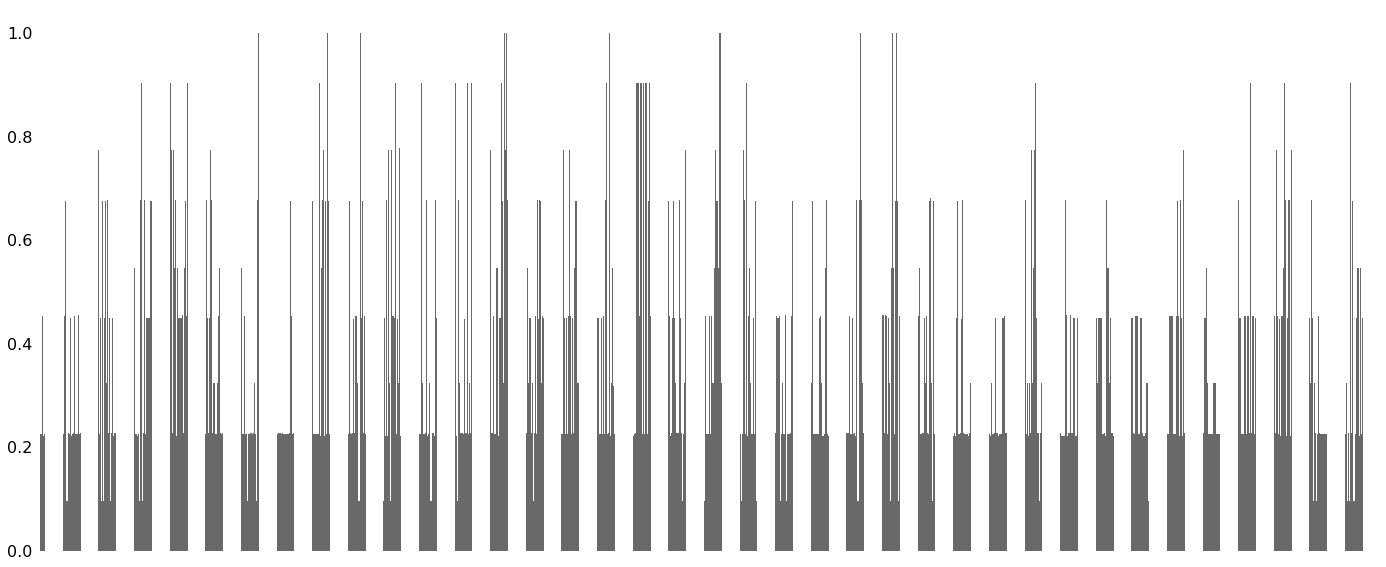

In [24]:
msno.bar(df)

#df.isnull     - Retorna um objeto de mesmo tamanho com True para NaN e False para os demais
#df.shape[0]   - Retorna o numero de linhas
#sum(axis = 0) - Faz a soma das linhas

Calcula a porcentagem de 'NaN' em cada coluna

In [25]:
missing = (df.isnull()/df.shape[0]).sum(axis = 0)

Organiza em ordem crescente

In [26]:
sorted_missing = missing.sort_values(ascending = True)

Data de início dos dados e Data de início dos dados e 

In [27]:
df.index[0]

Timestamp('2015-01-02 00:00:00')

In [28]:
df.index[-1]

Timestamp('2019-05-31 00:00:00')

Apaga alguns dias para fechar em um mês exato (02/01/2015 - 02/05/2019)

In [29]:
df_new = df.loc[~((df.index.year == 2019) & (df.index.month == 5) & (df.index.day > 2))]

Data de início dos dados e Data de fim dos dados

In [30]:
df_new.index[0]

Timestamp('2015-01-02 00:00:00')

In [31]:
df_new.index[-1]

Timestamp('2019-05-02 00:00:00')

In [32]:
df_new.shape

(1331, 3980)

Obtem as 'labels' das linhas

In [33]:
df_new.index

DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
               '2015-01-12', '2015-01-13',
               ...
               '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
               '2019-04-26', '2019-04-27', '2019-04-28', '2019-04-29',
               '2019-04-30', '2019-05-02'],
              dtype='datetime64[ns]', length=1331, freq=None)

In [34]:
#df.isnull().sum() - Contagem de nulos
#df.shape[0] - Numero de linhas

#50%
n = 0.5 

#Coloca True para linhas com soma MAIOR do que N e False para linhas com soma MENOR do que N
drop_cols = df_new.isnull().sum() / df_new.shape[0] > n

In [35]:
#Remove todos os True do drop_cols
df_new = df_new.drop(columns = df_new.columns[drop_cols])

In [36]:
#Exibe o shape; 3063 colunas removidas

df_new.shape

(1331, 917)

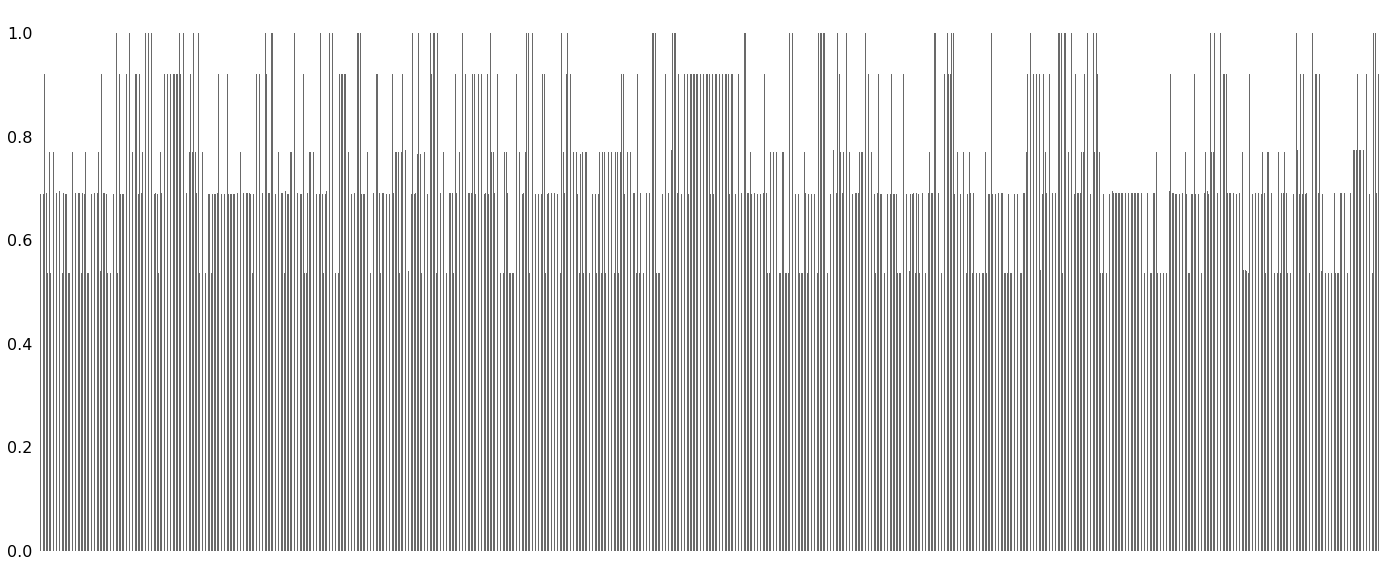

In [37]:
#Exibe um gráfico de barras mostrando a nulidade por coluna

msno.bar(df_new)

In [38]:
frequent = df_new.fillna(value=0)

In [39]:
#(frequent != 0).sum() - Soma dos valores diferentes de zero
#frequent.shape[0] - Numero de linhas

#Divide a soma dos valores diferentes de zero pela quantidade de linhas, ordena em ordem decrescente e pega os primeiros 10 item
frequent_products = ((frequent != 0).sum() / frequent.shape[0]).sort_values(ascending = False)[:10]

In [40]:
#Exibe o top N produtos mais vendidos; 
frequent_products

ENTREGA                                        0.828700
CHIP CLARO ODA 128KB TRIPE                     0.724267
GE1 ELETROPORTATEIS                            0.667168
CHIP VIVO 4G 128K P19 HRS PRE                  0.606311
GE2 CELULAR                                    0.601803
CHIP OI 4G 128KB                               0.576258
GE1 CELULAR                                    0.567243
CHIP TIM INFINITY PRE HRD TRIPLO 4G            0.451540
VENTILADOR 30 NV-15 3P BR 220V                 0.377911
CHIP TIM INFINITY PRE DUPLO 4G HDR NACIONAL    0.366642
dtype: float64

In [41]:
#Organiza o frame onde as primeiras colunas são os itens com maior frequencia

frequent = frequent[frequent_products.keys()]

In [42]:
frequent.shape

(1331, 10)

In [43]:
#Top N
frequent.to_csv("TOP_frequencia.csv")

#Loja 32 filtrada
df_new.to_csv("32_filtrada.csv")

# Parte 2 - Decomposição de um único produto

In [44]:
df = pd.read_csv("top_frequent.csv", index_col=0)

In [45]:
df.shape

(1331, 10)

In [46]:
print("Data de Inicio:",df.index[0],"\nData de Fim:", df.index[-1])

Data de Inicio: 2015-01-02 
Data de Fim: 2019-05-02


### Calculos basicos para o intervalo de tempo

#### Número de dias - 1.581 dias
#### Número de semanas - 25,86 semanas
#### Número de meses - 51,94 meses
#### Número de anos - 4,33 anos

#### Possuimos 1331 linhas sendo que o esperado para o intervalo de tempo é de 1581 (diferença de 250 dias)

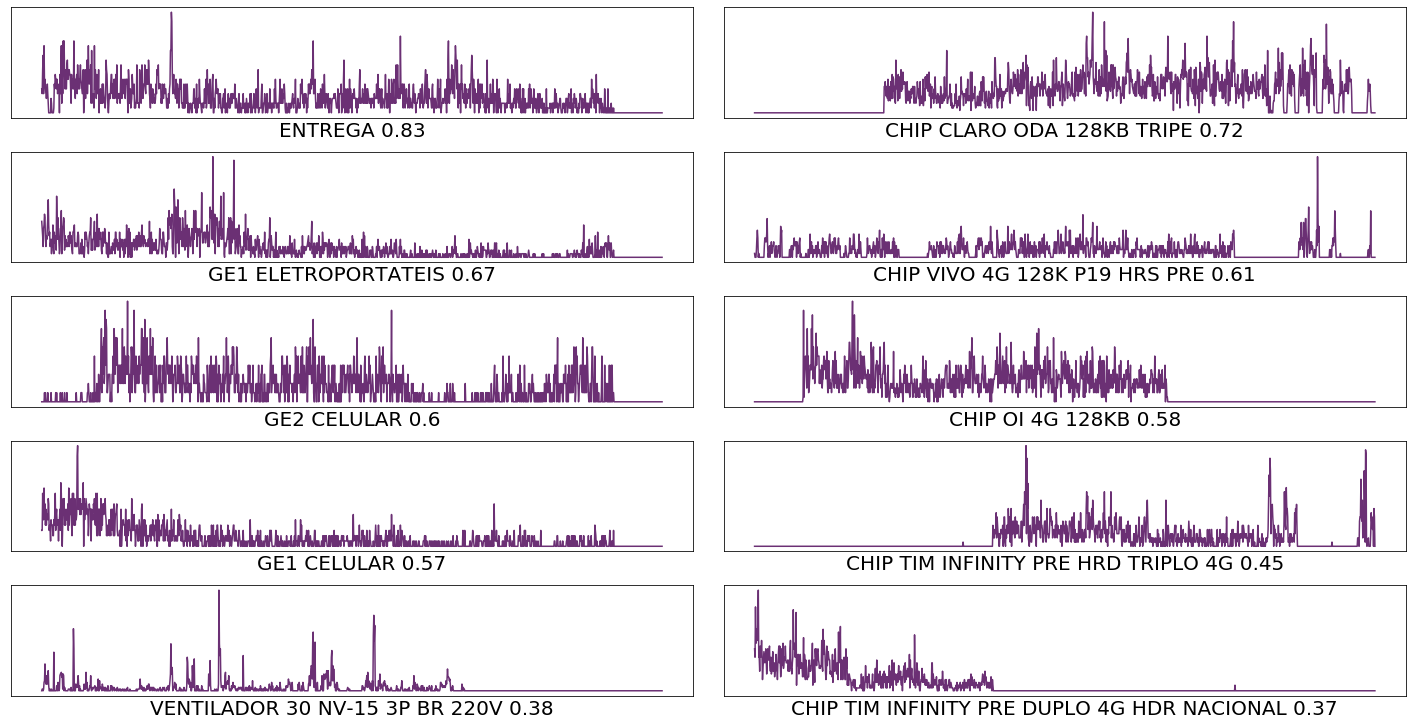

In [48]:
freq = ((df != 0).sum() / df.shape[0]).sort_values(ascending = False)

plt.figure(figsize=(20,50))

for i in range(len(df.columns)):
    plt.subplot(25, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.plot(df[df.columns[i]], color="#6b3074")
    plt.xlabel(df.columns[i] + " " + str(np.round(freq[df.columns[i]],2)), fontsize=20)

plt.tight_layout()
plt.show()

In [49]:
df.index = pd.to_datetime(df.index)

In [50]:
#Seleciona um unico produto; Neste caso, vamos utilizar o 'GE1 ELETROPORTATEIS'

data = df.iloc[:,2]

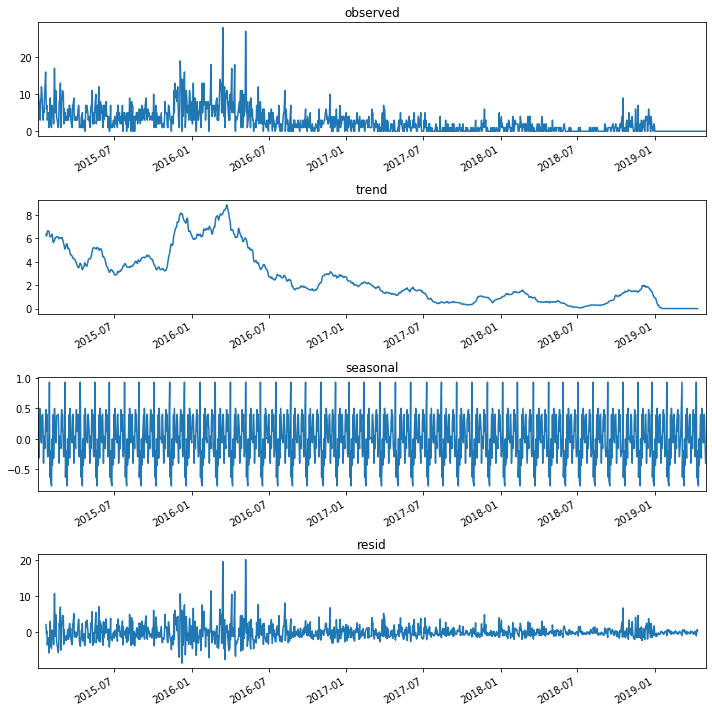

In [53]:
%matplotlib inline

#Faz a decomposição dos dados com frequencia de 30
result = seasonal_decompose(data, model = 'additive', freq = 30)

#Cria 4 figs
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(10,10))

#Plota
result.observed.plot(ax = ax1, title = "observed")
result.trend.plot(ax = ax2, title = "trend")
result.seasonal.plot(ax = ax3, title = "seasonal")
result.resid.plot(ax = ax4, title = "resid")

plt.tight_layout()

#### Processando as decomposições

In [54]:
df_observed = pd.DataFrame(result.observed)
df_trend    = pd.DataFrame(result.trend)
df_seasonal = pd.DataFrame(result.seasonal)
df_resid    = pd.DataFrame(result.resid)

df_observed.columns = ["Observed"]
df_trend.columns    = ["trend"]
df_seasonal.columns = ["seasonal"]
df_resid.columns    = ["resid"]

In [55]:
df_ = pd.concat([df_observed, df_trend, df_seasonal, df_resid], axis=1)

In [56]:
#Preencha os valores NA / NaN usando o método especificado (valor = 0)

df_ = df_.fillna(value=0)

In [57]:
df_

,Observed,trend,seasonal,resid
2015-01-02,10.0,0.0,0.398484,0.0
2015-01-03,8.0,0.0,-0.316632,0.0
2015-01-05,6.0,0.0,0.502360,0.0
2015-01-06,3.0,0.0,0.320189,0.0
2015-01-07,8.0,0.0,-0.002679,0.0
...,...,...,...,...
2019-04-27,0.0,0.0,-0.066632,0.0
2019-04-28,0.0,0.0,0.377554,0.0
2019-04-29,0.0,0.0,0.403910,0.0
2019-04-30,0.0,0.0,0.129492,0.0


In [58]:
df_.to_csv("Objeto2.csv")